v0.1 (04/11/24)

## NeuroMotor Project

In [52]:
import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

import scipy.signal as sig

path_all = '../RepositoryData'
plt.style.use('seaborn-v0_8-bright')


In [53]:
single_subject = path_all + '/SL01-T01'
sgl_subj_eeg = single_subject + '/eeg.txt'

In [54]:
# # check the path
# !ls -l $path_all

In [55]:
# Load the data
eeg = pd.read_csv(sgl_subj_eeg, sep='\t', on_bad_lines='warn', skiprows=1, header=None)
eeg.dropna(axis=1, how='all', inplace=True)
# first column is the time in seconds
time = eeg.iloc[:, 0]
eeg = eeg.iloc[:, 1:]
# print(eeg.head(10))
print(time.head(10))
# take df to numpy array
eeg = eeg.to_numpy()
time = time.to_numpy()
print(eeg.shape, time.shape)

0    0.139
1    0.142
2    0.153
3    0.163
4    0.174
5    0.184
6    0.194
7    0.205
8    0.215
9    0.226
Name: 0, dtype: float64
(137242, 64) (137242,)


In [56]:
print(time[0:100])

[0.139 0.142 0.153 0.163 0.174 0.184 0.194 0.205 0.215 0.226 0.236 0.246
 0.257 0.267 0.278 0.288 0.298 0.309 0.319 0.33  0.34  0.35  0.361 0.371
 0.382 0.392 0.402 0.413 0.423 0.434 0.444 0.455 0.466 0.476 0.487 0.497
 0.507 0.518 0.528 0.539 0.549 0.56  0.571 0.581 0.592 0.602 0.612 0.623
 0.633 0.644 0.654 0.665 0.676 0.686 0.697 0.707 0.717 0.728 0.738 0.749
 0.759 0.77  0.781 0.791 0.802 0.812 0.823 0.833 0.843 0.854 0.864 0.874
 0.885 0.895 0.906 0.916 0.927 0.938 0.948 0.959 0.969 0.979 0.99  1.
 1.011 1.021 1.032 1.043 1.053 1.064 1.074 1.085 1.098 1.108 1.119 1.13
 1.14  1.151 1.161 1.172]


[ 0.   0.   0.   0.   0.   0.  23.5 22.8 23.5 22.8]
[0.139 0.142 0.153 0.163 0.174 0.184 0.194 0.205 0.215 0.226]


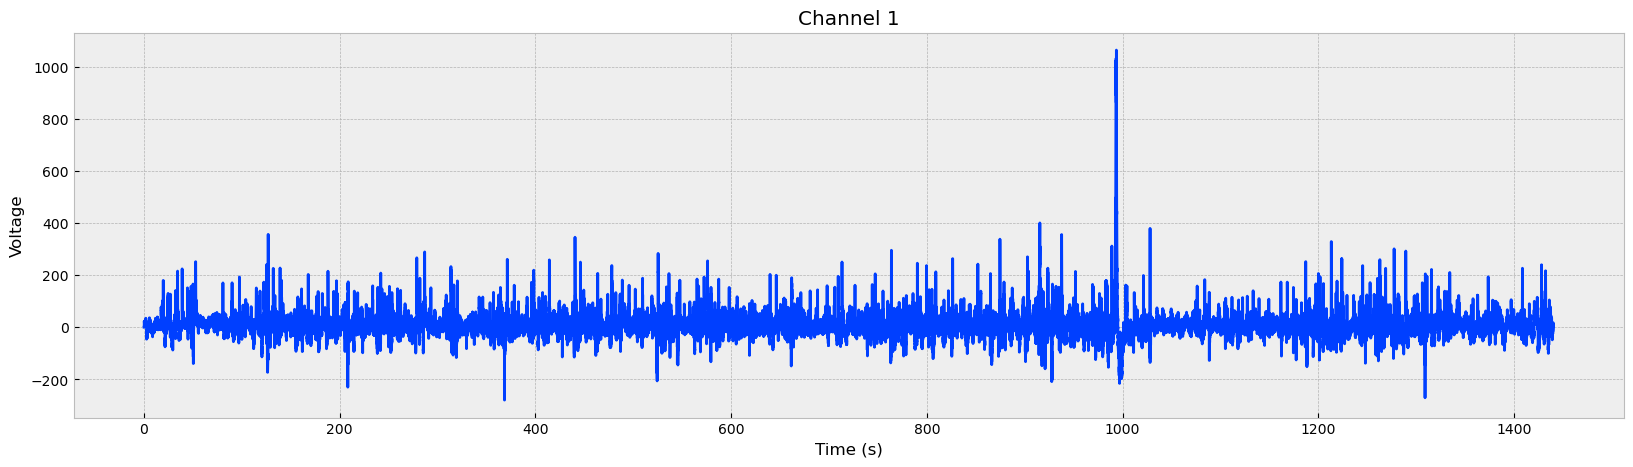

In [57]:
channel_1 = eeg[:, 1]
print(channel_1[0:10])
# print(time[1000:1010].shape, channel_1[1000:1010].shape)
print(time[0:10])

# graph the first channel vs time
plt.figure(figsize=(20, 5))
plt.plot(time, channel_1)
plt.title('Channel 1')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.show()


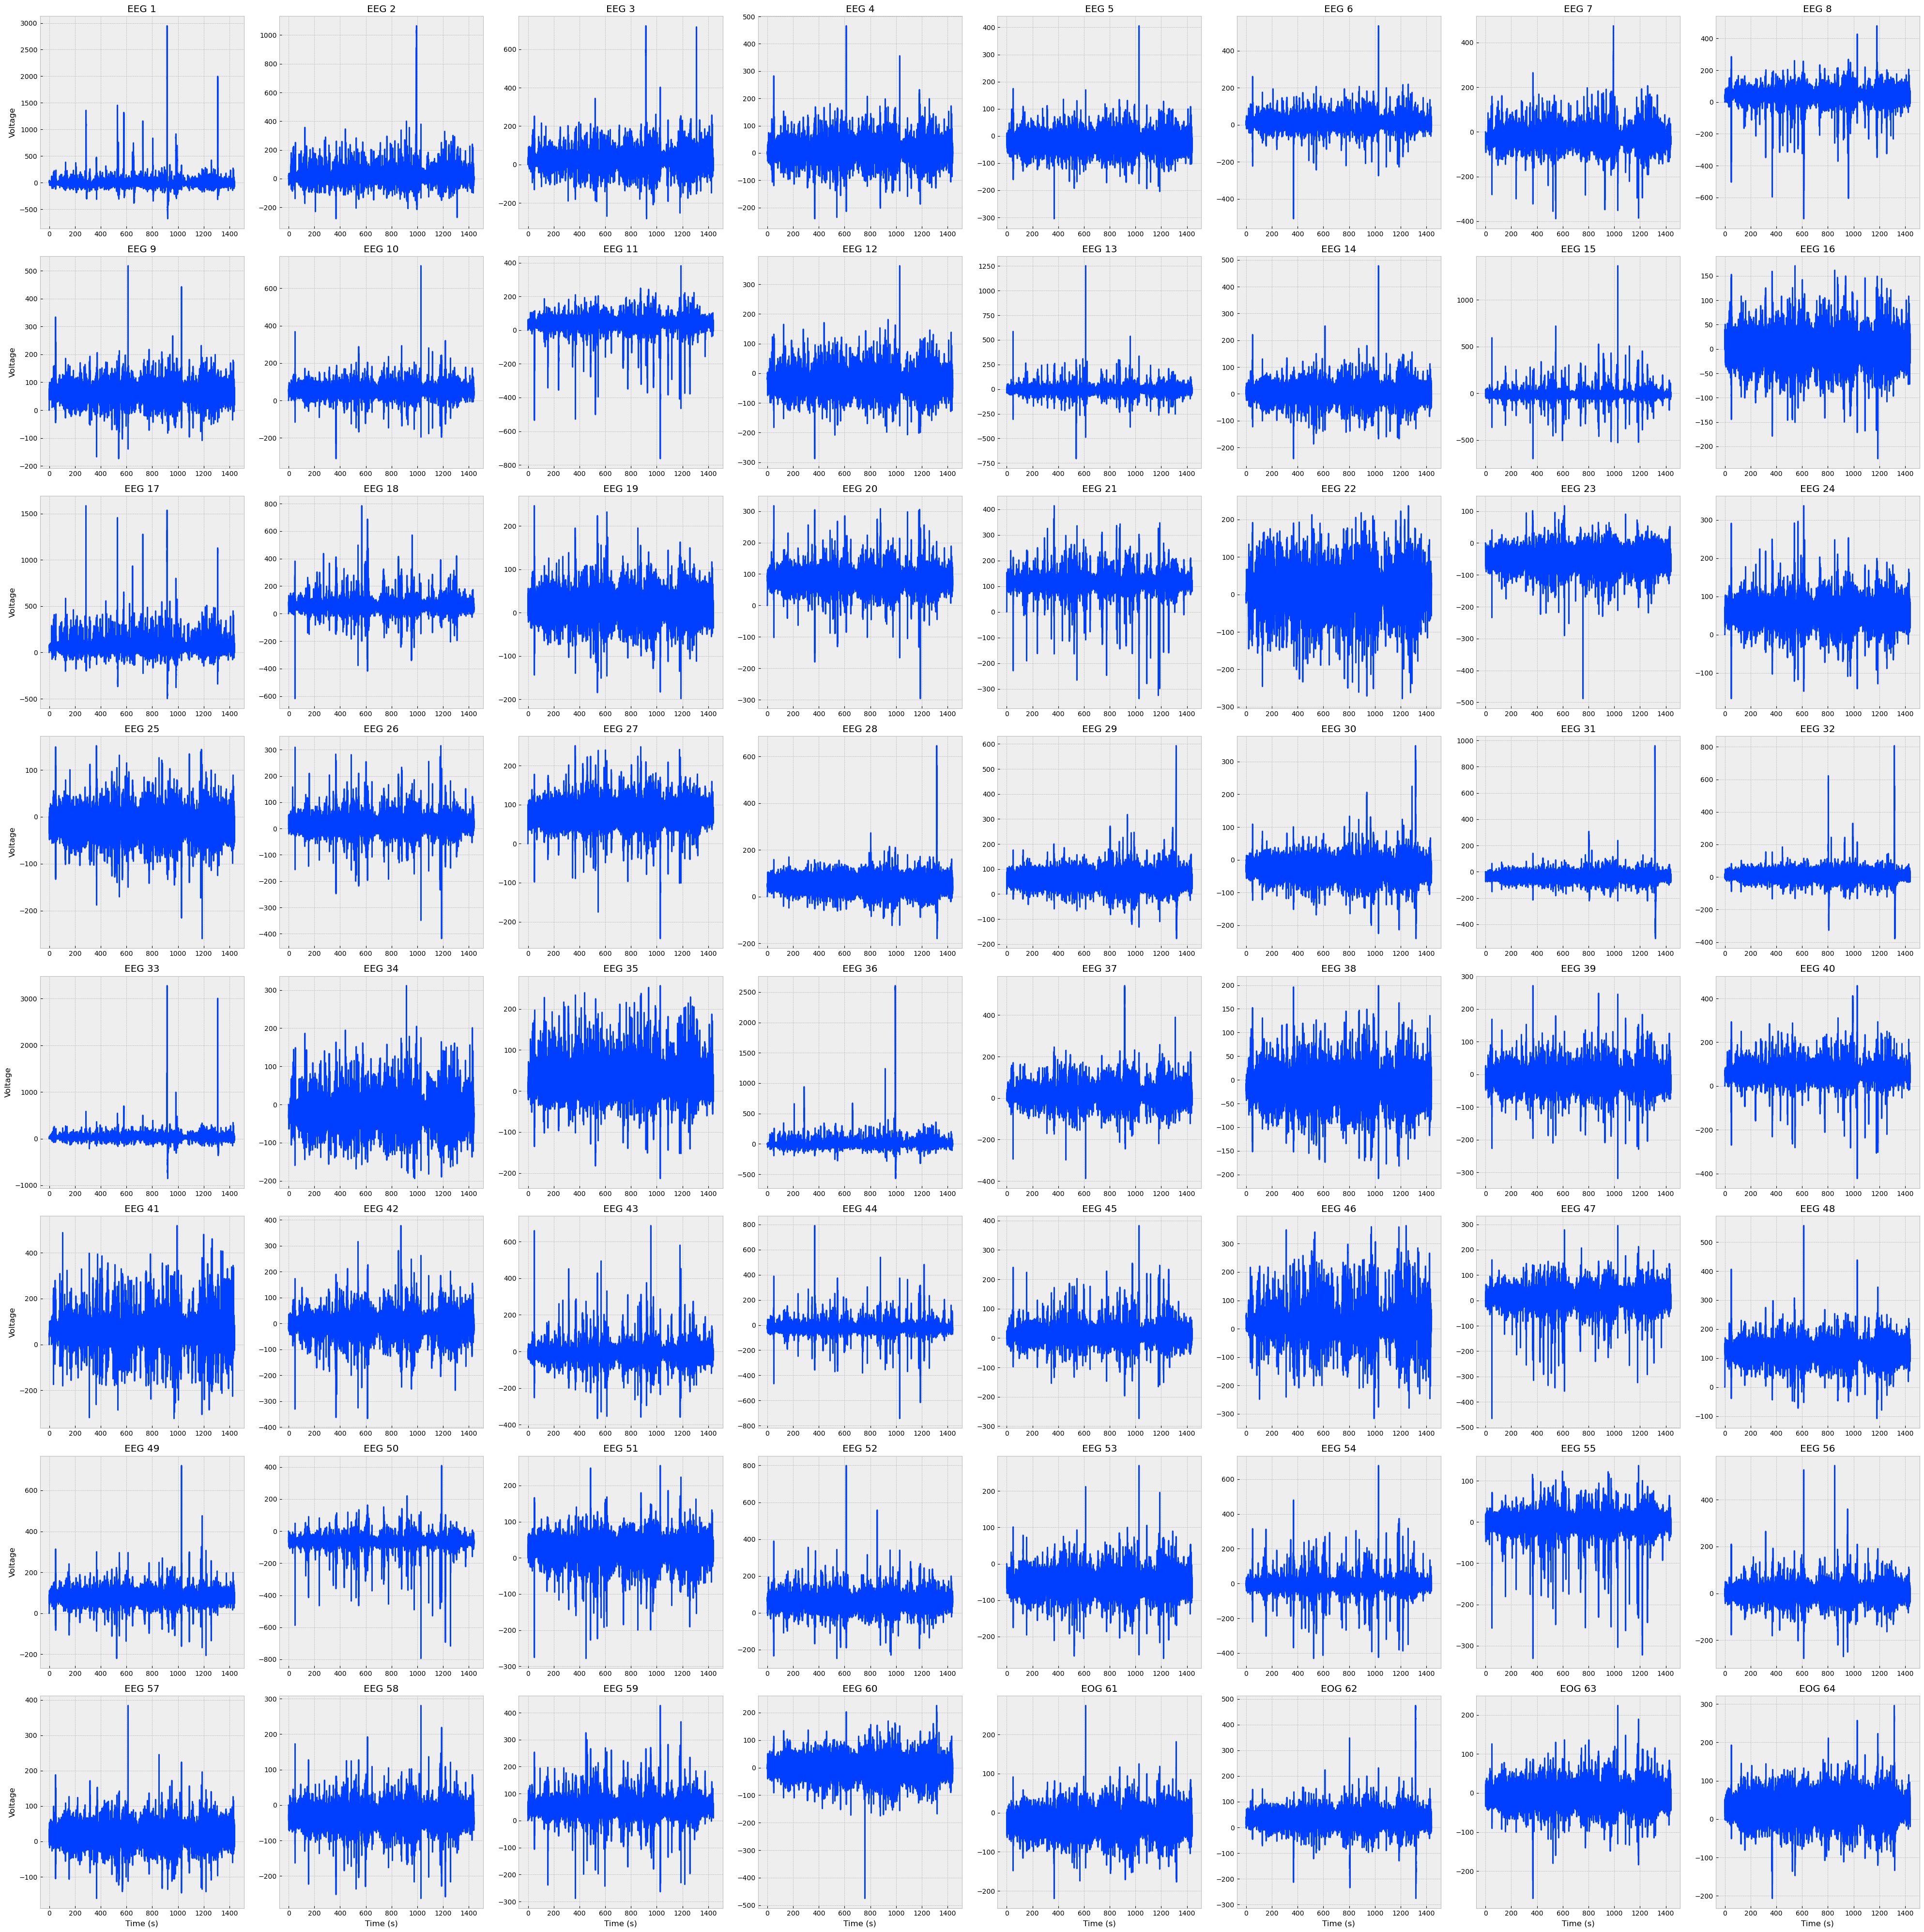

In [58]:
# plot 64 channels in 8x8 grid, label the last 4 channels as EOG, and first 60 as EEG
def visualize_subject_eeg(eeg, time):
    fig, axs = plt.subplots(8, 8, figsize=(40, 40))
    for i in range(8):
        for j in range(8):
            axs[i, j].plot(time, eeg[:, i * 8 + j])
            if i == 7:
                axs[i, j].set_xlabel('Time (s)')
            if j == 0:
                axs[i, j].set_ylabel('Voltage')
            if i * 8 + j < 60:
                axs[i, j].set_title('EEG ' + str(i * 8 + j + 1))
            else:
                axs[i, j].set_title('EOG ' + str(i * 8 + j + 1))
    plt.tight_layout()
    plt.show()

visualize_subject_eeg(eeg, time)

In [59]:
def butter_lowpass(cutoff, fs, order=5):
    return sig.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = sig.lfilter(b, a, data)
    return y

loop: 0
loop: 1
loop: 2
loop: 3
loop: 4


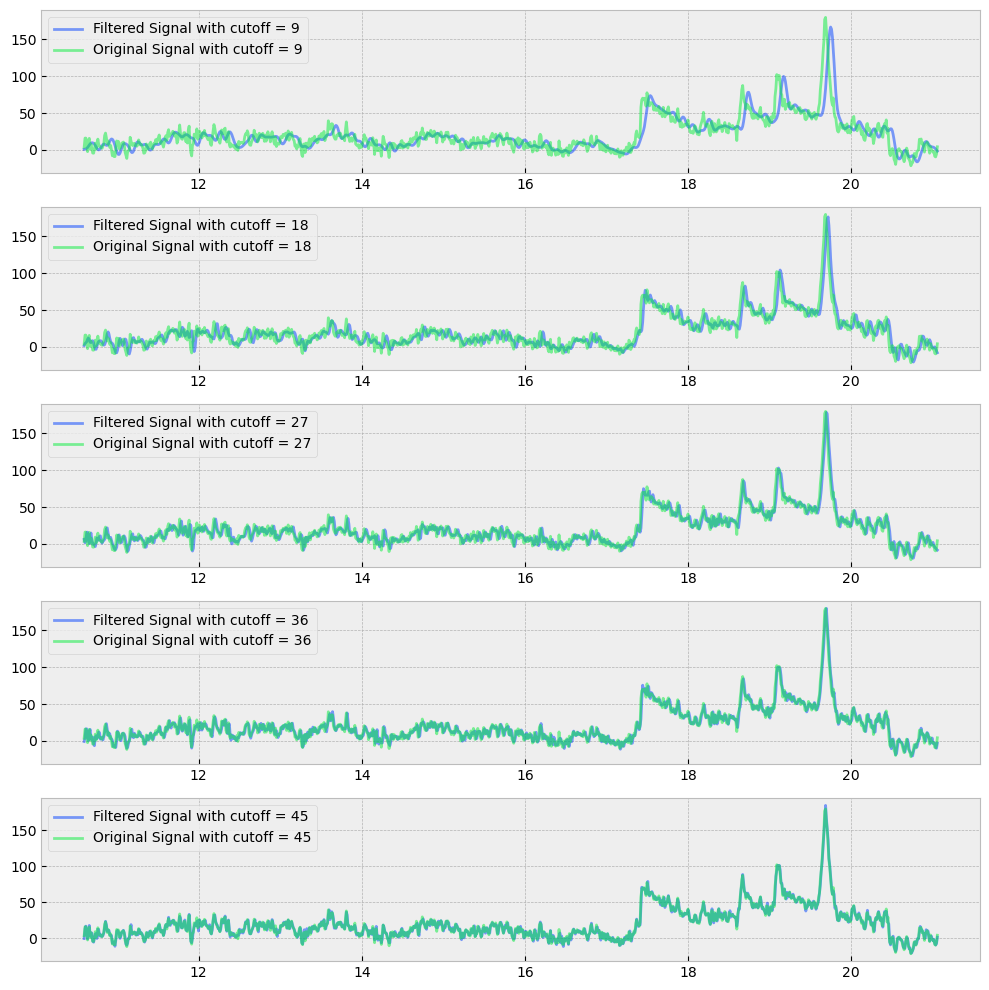

In [91]:
def lp(data, fc): # filter out all freq above 50 with 
    return butter_lowpass_filter(data=data, cutoff=fc, fs=100)

# y = lp(channel_1, 40)

fig, axs = plt.subplots(5, 1, figsize=(20, 20))

for i in range (1, 6):
    index=i-1
    print(f"loop: {index}")
    y = eeg[:, 1]
    y_f = lp(y, i * 9)
    axs[index].plot(time[1000:2000], y_f[1000:2000], alpha=.5, label=f"Filtered Signal with cutoff = {i*9}")
    axs[index].plot(time[1000:2000], y[1000:2000], alpha=.5, label=f"Original Signal with cutoff = {i*9}")
    axs[index].set_xlabel('Time (s)') if index == 5 else None
    axs[index].legend()

plt.tight_layout()
plt.show()

# plt.subplot(511)
# plt.plot(time[1000:2000], y[1000:2000], alpha=.5, label=f"Filtered Signal")
# plt.plot(time[1000:2000], channel_1[1000:2000], alpha=.5, label=f"Raw Signal")
# plt.title('Channel 1')
# plt.xlabel('Time (s)')
# plt.ylabel('Voltage')
# plt.legend()
# plt.show()

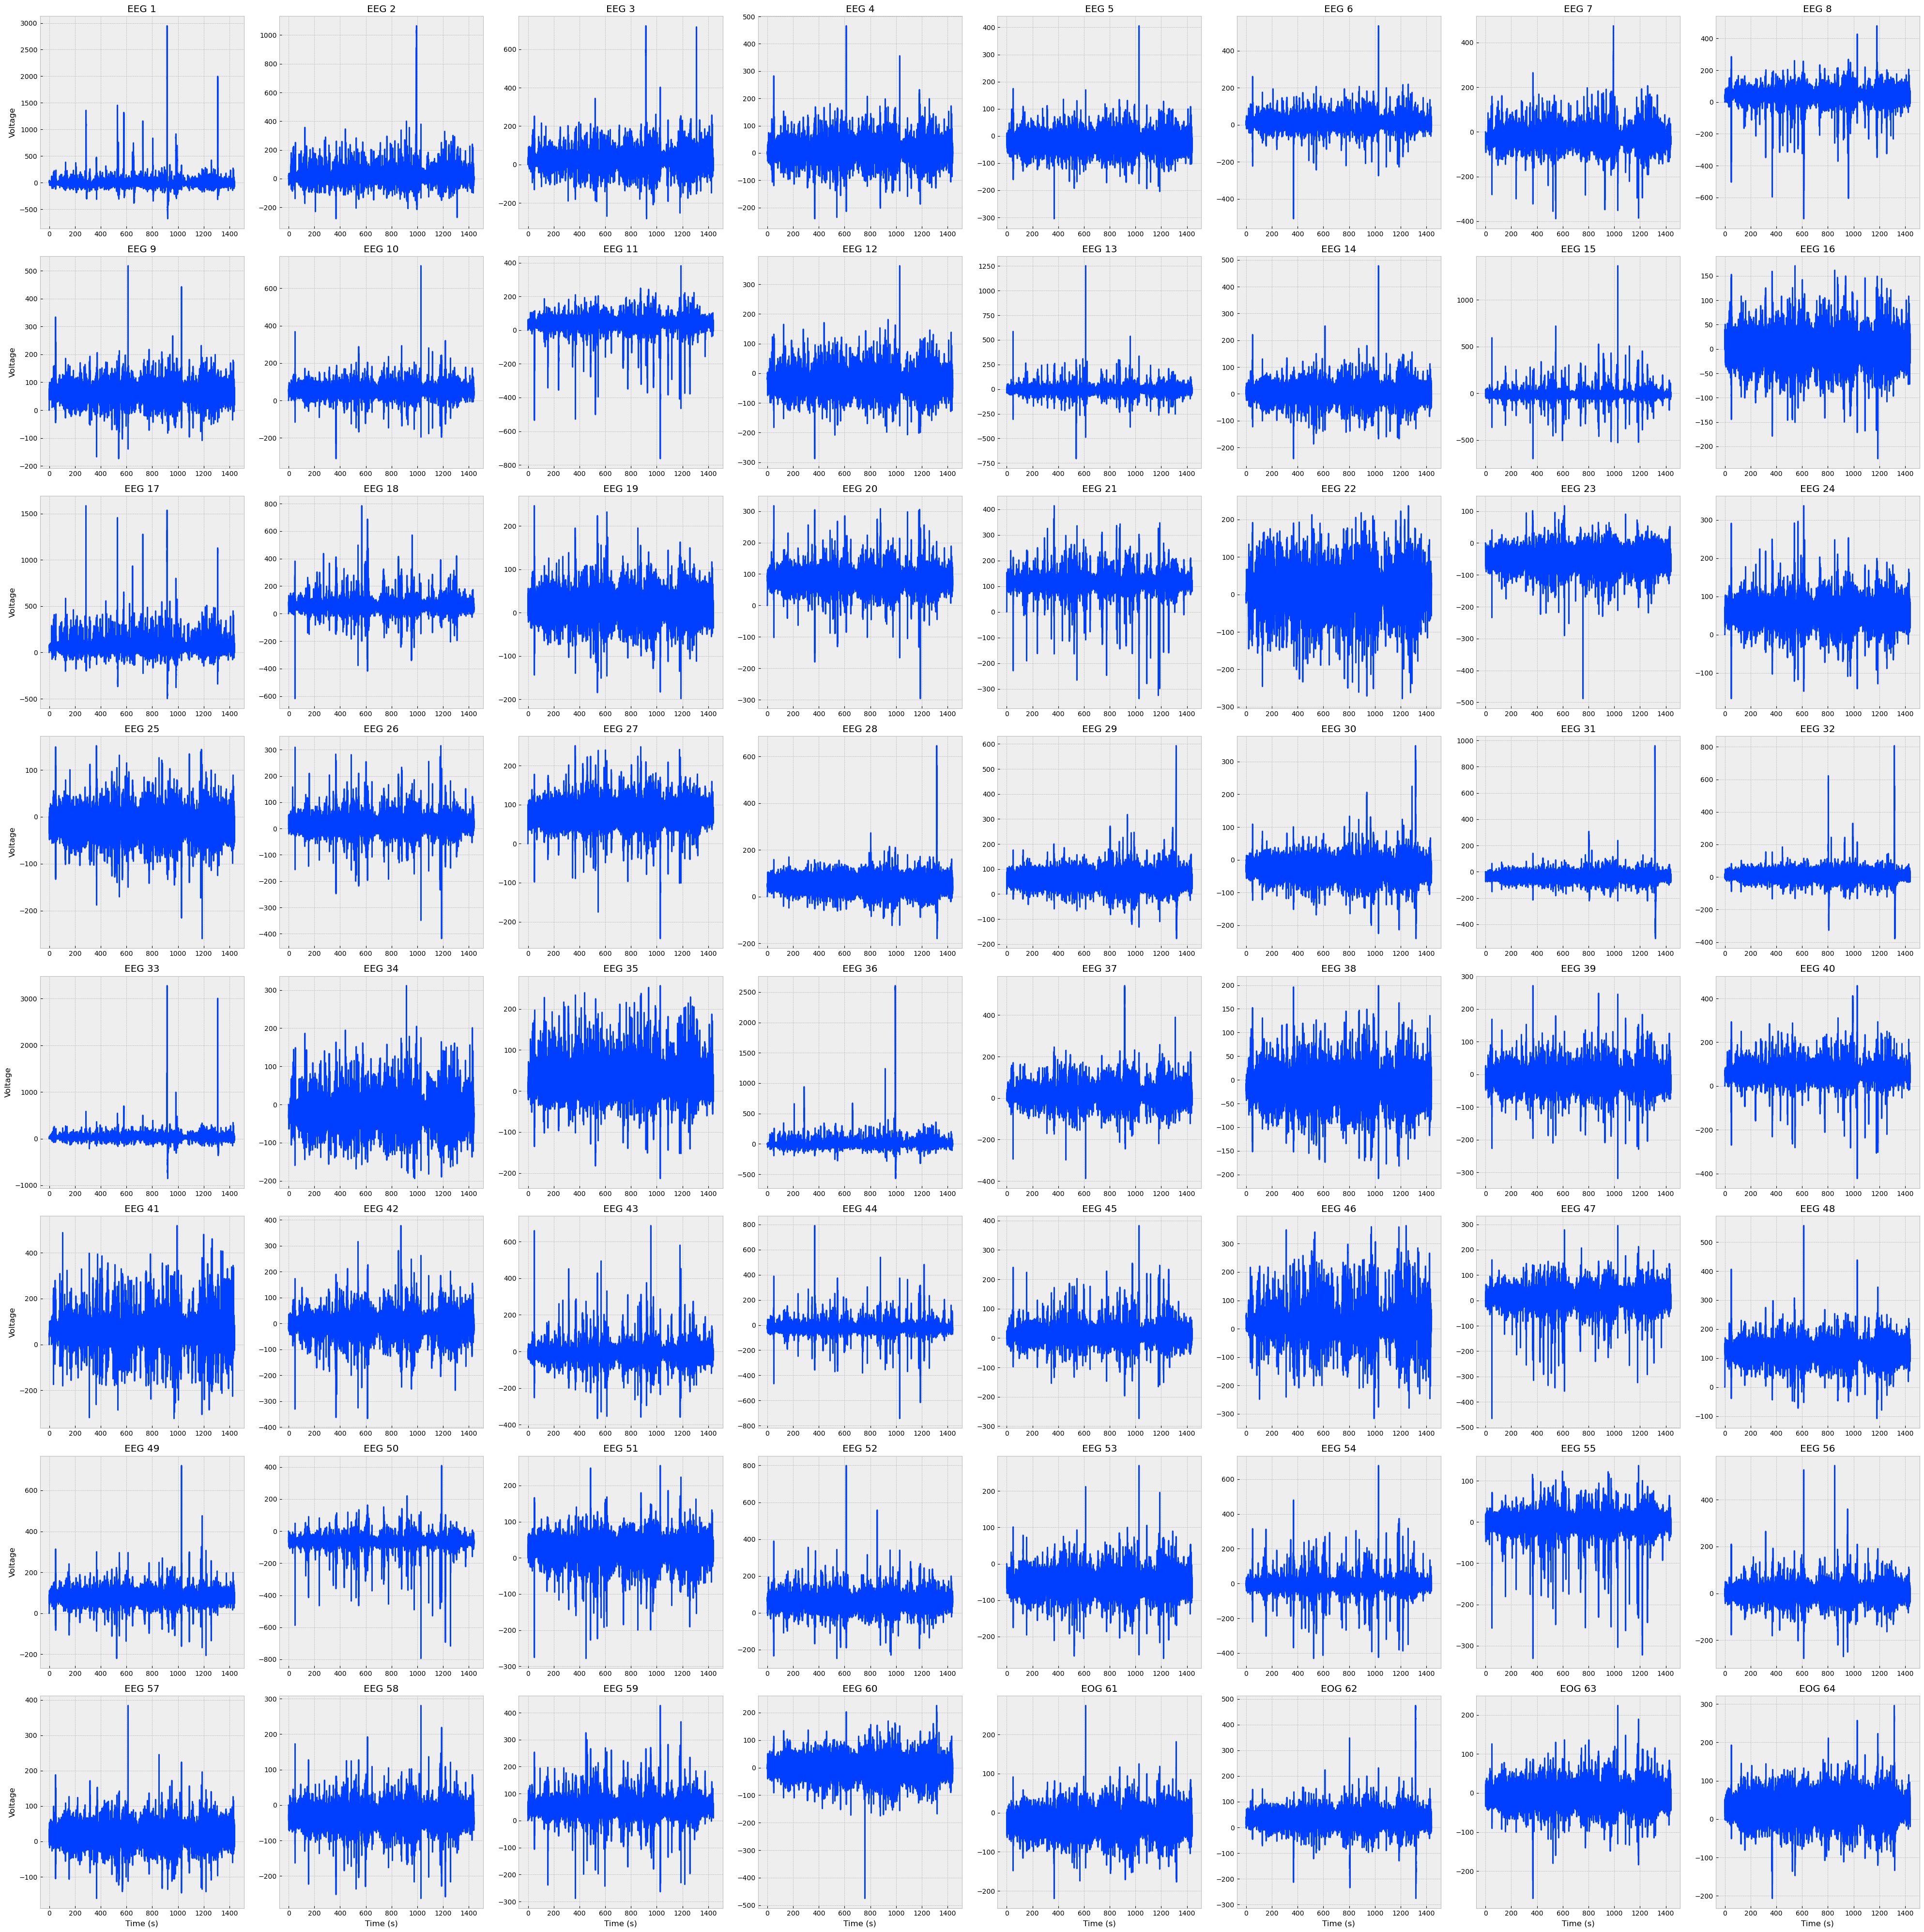

In [63]:
def visualize_subject_eeg_flt(eeg, time):

    eeg_f = lp_50(eeg)
    fig, axs = plt.subplots(8, 8, figsize=(40, 40))
    for i in range(8):
        for j in range(8):
            # axs[i, j].plot(time, eeg[:, i * 8 + j], label="o", alpha=.3)
            axs[i, j].plot(time, eeg_f[:, i * 8 + j], label="f", alpha=.3)
            if i == 7:
                axs[i, j].set_xlabel('Time (s)')
            if j == 0:
                axs[i, j].set_ylabel('Voltage')
            if i * 8 + j < 60:
                axs[i, j].set_title('EEG ' + str(i * 8 + j + 1))
            else:
                axs[i, j].set_title('EOG ' + str(i * 8 + j + 1))
    plt.tight_layout()
    plt.legend()
    plt.show()

visualize_subject_eeg(eeg, time)